In [2]:
from torch import nn, optim
from lion_pytorch import Lion
import matplotlib.pyplot as plt

In [15]:
from IPython.display import clear_output

!pip install lion-pytorch

clear_output()

In [16]:
net = nn.Linear(10, 1)

In [19]:
optimizer = Lion(
    net.parameters(),
    lr=0.0001,
    betas=(0.9, 0.99),
    weight_decay=1e-2,
    use_triton=False,
)
optimizer

Lion (
Parameter Group 0
    betas: (0.9, 0.99)
    lr: 0.0001
    weight_decay: 0.01
)

In [18]:
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.0001,
   'betas': (0.9, 0.99),
   'weight_decay': 0.01,
   'params': [0, 1]}]}

In [9]:
EPOCHS = 100
LR = 0.0001

In [10]:
lr_sche = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS, eta_min=LR*0.1)

In [11]:
lr_sche.state_dict()

{'T_max': 100,
 'eta_min': 1e-05,
 'base_lrs': [0.0001],
 'last_epoch': 0,
 'verbose': False,
 '_step_count': 1,
 '_get_lr_called_within_step': False,
 '_last_lr': [0.0001]}

In [12]:
def get_lr(optimizer):
    return optimizer.state_dict()['param_groups'][0]['lr']

In [13]:
lrs = []
for _ in range(EPOCHS):
    print("lr =", optimizer.state_dict()['param_groups'][0]['lr'])
    optimizer.zero_grad()
    ...
    optimizer.step()
    lrs.append(get_lr(optimizer))
    lr_sche.step()

lr = 0.0001
lr = 9.997779521645793e-05
lr = 9.991120277927223e-05
lr = 9.980028840713861e-05
lr = 9.964516155915153e-05
lr = 9.944597532678122e-05
lr = 9.920292628279102e-05
lr = 9.891625428724366e-05
lr = 9.858624225078842e-05
lr = 9.821321585546247e-05
lr = 9.779754323328194e-05
lr = 9.733963460294018e-05
lr = 9.683994186497135e-05
lr = 9.629895815577918e-05
lr = 9.571721736097092e-05
lr = 9.509529358847659e-05
lr = 9.44338006019739e-05
lr = 9.373339121517751e-05
lr = 9.299475664759073e-05
lr = 9.221862584235533e-05
lr = 9.140576474687269e-05
lr = 9.055697555690612e-05
lr = 8.967309592491057e-05
lr = 8.875499813337074e-05
lr = 8.780358823396357e-05
lr = 8.681980515339469e-05
lr = 8.580461976679105e-05
lr = 8.47590339395644e-05
lr = 8.36840795386911e-05
lr = 8.258081741438401e-05
lr = 8.145033635316136e-05
lr = 8.029375200334595e-05
lr = 7.911220577405491e-05
lr = 7.790686370876678e-05
lr = 7.667891533457724e-05
lr = 7.542957248827967e-05
lr = 7.416006812042833e-05
lr = 7.287165507856

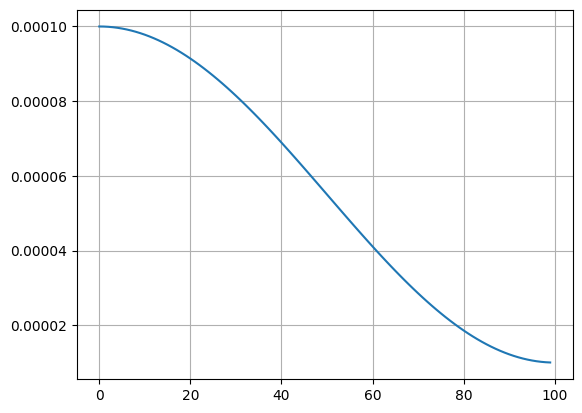

In [14]:
plt.plot(lrs)
plt.grid(True)